<a href="https://colab.research.google.com/github/Vivekchavda1374/ML/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# What is Pruning

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
iris = datasets.load_iris()
class_name = iris.target_names
# iris_df = pd.DataFrame(data=
data = pd.DataFrame({"Sepal Length" : iris.data[:,0],
                     "Sepal Width" : iris.data[:,1],
                     "Petal Length" : iris.data[:,2],
                     "Petal Width" : iris.data[:,3] ,
                     "Species" : iris.target ,
                     "Species Name" : class_name[iris.target]});
data.head()
# iris.data, columns=iris.feature_names)
# iris_df['target'] = iris.target
# iris_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Species Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# iris_df['Target'] = iris_df['target'].apply(lambda x: class_name[x])
# iris_df.head()

In [ ]:
X = data.drop(['Species','Species Name'], axis=1)
Y = data['Species']

In [ ]:
X_Train , X_Test  , y_train , Y_Test = train_test_split(X,Y , test_size=0.2 , random_state=42);

In [ ]:
X_Train

,Sepal Length,Sepal Width,Petal Length,Petal Width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
forest = RandomForestClassifier(n_estimators=200 , random_state = 42)
forest.fit(X_Train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
Y_Predicted = forest.predict(X_Test)

In [ ]:
metrics.accuracy_score(Y_Test,Y_Predicted)

1.0

In [ ]:
confusion_matrix = confusion_matrix(y_true = Y_Test , y_pred = Y_Predicted)
confusion_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Text(0.5, 1.0, 'Confusion Matrix')

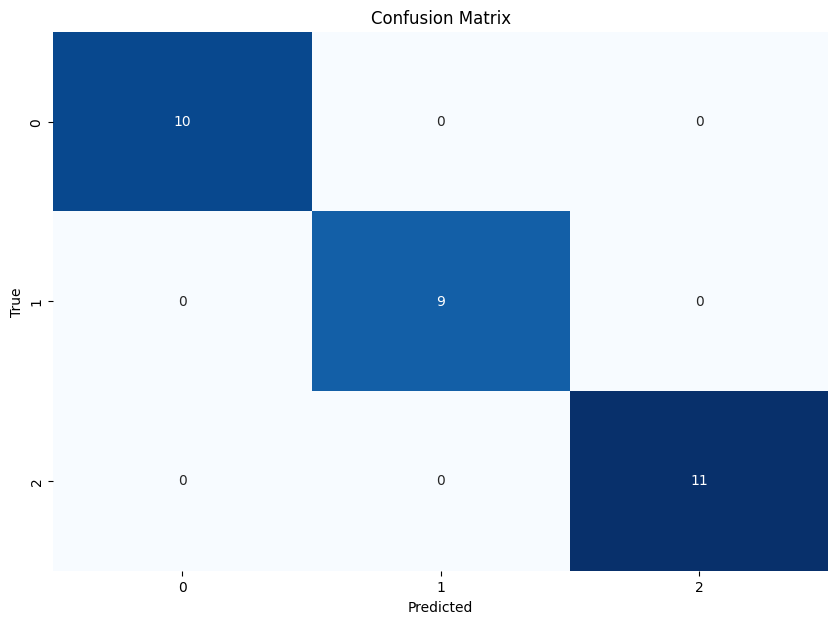

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [ ]:
tree  = forest.estimators_[5]

In [ ]:
export_graphviz(tree, out_file='/content/tree.dot', feature_names=X.columns, rounded=True, precision=1)

In [ ]:
graph = pydot.graph_from_dot_file('/content/tree.dot')
graph[0].write_png('/content/tree.png')

In [ ]:
(graph,) = pydot.graph_from_dot_file('/content/tree.dot')

In [ ]:
forest.feature_importances_

array([0.10196014, 0.03119641, 0.45803602, 0.40880743])

In [ ]:
pd.Series(forest.feature_importances_, index=X.columns)

,0
Sepal Length,0.101960
Sepal Width,0.031196
Petal Length,0.458036
Petal Width,0.408807


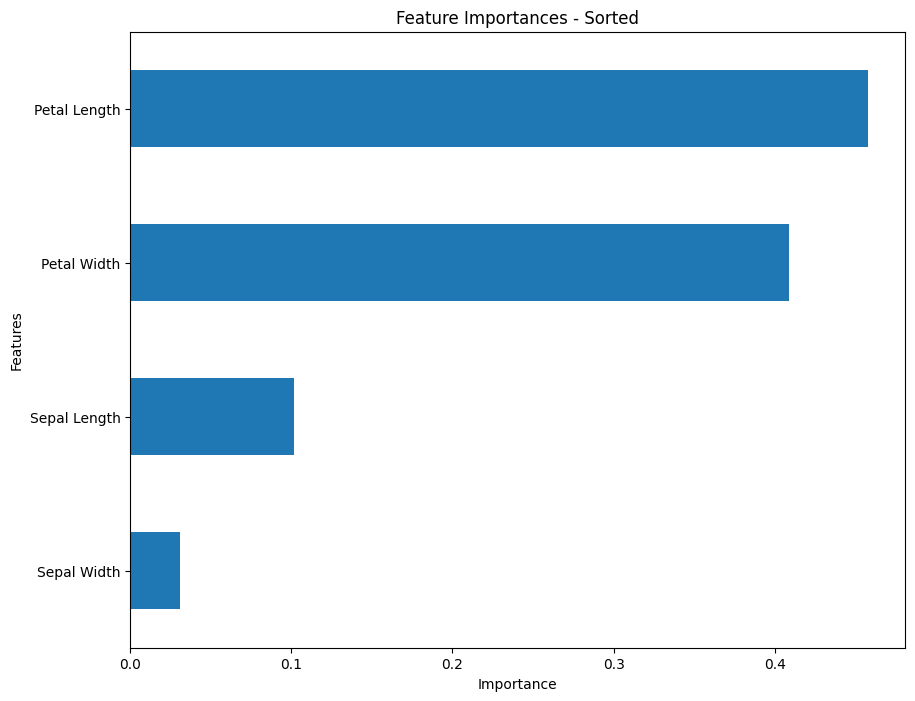

In [ ]:
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)

# Sort the feature importances in descending order
sorted_importances = feature_importances.sort_values(ascending=True)

# Plot the sorted feature importances
sorted_importances.plot(kind='barh', figsize=(10, 8))

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances - Sorted')
plt.show()